                                   House Price Prediction

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
data = pd.read_csv("housing_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   House_Size     10000 non-null  float64
 1   Num_Bedrooms   10000 non-null  int64  
 2   Num_Bathrooms  10000 non-null  int64  
 3   Location       10000 non-null  object 
 4   Year_Built     10000 non-null  int64  
 5   Garage         10000 non-null  object 
 6   Price          10000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 547.0+ KB


                        Step 1: Generate synthetic dataset

In [13]:
np.random.seed(42)

# Create sample data
n = 10000
data = pd.DataFrame({
    'House_Size': np.random.normal(1500, 500, n), 
    'Num_Bedrooms': np.random.randint(1, 6, n),
    'Num_Bathrooms': np.random.randint(1, 4, n),
    'Location': np.random.choice(['Urban', 'Suburban', 'Rural'], n),
    'Year_Built': np.random.randint(1950, 2024, n),
    'Garage': np.random.choice(['Yes', 'No'], n),
    'Price': np.random.normal(200000, 80000, n)
})

data.head()

,House_Size,Num_Bedrooms,Num_Bathrooms,Location,Year_Built,Garage,Price
0,1748.357077,2,2,Suburban,1968,Yes,207664.864138
1,1430.867849,1,1,Urban,1983,Yes,132888.377284
2,1823.844269,5,2,Rural,1952,No,223811.167426
3,2261.514928,2,3,Rural,1988,Yes,189656.551841
4,1382.923313,1,2,Suburban,2009,Yes,71582.475891


In [14]:
data.describe

<bound method NDFrame.describe of        House_Size  Num_Bedrooms  Num_Bathrooms  Location  Year_Built Garage  \
0     1748.357077             2              2  Suburban        1968    Yes   
1     1430.867849             1              1     Urban        1983    Yes   
2     1823.844269             5              2     Rural        1952     No   
3     2261.514928             2              3     Rural        1988    Yes   
4     1382.923313             1              2  Suburban        2009    Yes   
...           ...           ...            ...       ...         ...    ...   
9995  2150.551032             5              1     Urban        1971     No   
9996   500.827516             3              1     Urban        1996     No   
9997  1147.341638             5              3     Urban        2015     No   
9998  1747.882787             4              3     Rural        1959    Yes   
9999  1822.194227             2              2     Urban        1992     No   

              Pri

In [15]:
data.shape

(10000, 7)

In [16]:
data.dtypes

House_Size       float64
Num_Bedrooms       int32
Num_Bathrooms      int32
Location          object
Year_Built         int32
Garage            object
Price            float64
dtype: object

In [17]:
data[['House_Size', 'Price']].head()

,House_Size,Price
0,1748.357077,207664.864138
1,1430.867849,132888.377284
2,1823.844269,223811.167426
3,2261.514928,189656.551841
4,1382.923313,71582.475891


In [18]:
data.loc[0:3,['House_Size','Price','Year_Built']]

,House_Size,Price,Year_Built
0,1748.357077,207664.864138,1968
1,1430.867849,132888.377284,1983
2,1823.844269,223811.167426,1952
3,2261.514928,189656.551841,1988


                        Step 2 : Handling Missing Values

In [19]:
print(data.isnull().sum())  

House_Size       0
Num_Bedrooms     0
Num_Bathrooms    0
Location         0
Year_Built       0
Garage           0
Price            0
dtype: int64


In [20]:
data.isnull()

,House_Size,Num_Bedrooms,Num_Bathrooms,Location,Year_Built,Garage,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False


In [21]:
data.isnull().sum().sum()

np.int64(0)

In [22]:
data.isnull().sum()/data.shape[0]*100

House_Size       0.0
Num_Bedrooms     0.0
Num_Bathrooms    0.0
Location         0.0
Year_Built       0.0
Garage           0.0
Price            0.0
dtype: float64

In [23]:
data.isnull().sum().sum()/data.size*100

np.float64(0.0)

 #Removing missing values

In [24]:
data.dropna()  
#It will remove the rows where missing values are present

,House_Size,Num_Bedrooms,Num_Bathrooms,Location,Year_Built,Garage,Price
0,1748.357077,2,2,Suburban,1968,Yes,207664.864138
1,1430.867849,1,1,Urban,1983,Yes,132888.377284
2,1823.844269,5,2,Rural,1952,No,223811.167426
3,2261.514928,2,3,Rural,1988,Yes,189656.551841
4,1382.923313,1,2,Suburban,2009,Yes,71582.475891
...,...,...,...,...,...,...,...
9995,2150.551032,5,1,Urban,1971,No,252423.929555
9996,500.827516,3,1,Urban,1996,No,146745.140963
9997,1147.341638,5,3,Urban,2015,No,410825.694389
9998,1747.882787,4,3,Rural,1959,Yes,322507.472025


                                Step 3 : Fill missing values

In [25]:
data.fillna(1000)

,House_Size,Num_Bedrooms,Num_Bathrooms,Location,Year_Built,Garage,Price
0,1748.357077,2,2,Suburban,1968,Yes,207664.864138
1,1430.867849,1,1,Urban,1983,Yes,132888.377284
2,1823.844269,5,2,Rural,1952,No,223811.167426
3,2261.514928,2,3,Rural,1988,Yes,189656.551841
4,1382.923313,1,2,Suburban,2009,Yes,71582.475891
...,...,...,...,...,...,...,...
9995,2150.551032,5,1,Urban,1971,No,252423.929555
9996,500.827516,3,1,Urban,1996,No,146745.140963
9997,1147.341638,5,3,Urban,2015,No,410825.694389
9998,1747.882787,4,3,Rural,1959,Yes,322507.472025


In [26]:
# Statistical Techniques: Mean, Median, Mode

mean_size = data['Num_Bedrooms'].mean()
median_size = data['Num_Bathrooms'].median()
mode_location = data['Location'].mode()[0]

print("\nStatistical values:")
print(f"Mean (Num_Bedrooms): {mean_size}")
print(f"Median (Num_Bathrooms): {median_size}")
print(f"Mode (Location): {mode_location}")



Statistical values:
Mean (Num_Bedrooms): 2.9998
Median (Num_Bathrooms): 2.0
Mode (Location): Suburban


In [27]:
data.fillna({
    'Num_Bedrooms': data['Num_Bedrooms'].mean(),
    'Num_Bathrooms': data['Num_Bathrooms'].median(),
    'Location': data['Location'].mode()[0],
    'Garage': data['Garage'].mode()[0]
}, inplace=True)

In [28]:
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
House_Size       0
Num_Bedrooms     0
Num_Bathrooms    0
Location         0
Year_Built       0
Garage           0
Price            0
dtype: int64


                                 Step 4 : Data Encoding

In [29]:
cat_cols = ['Location', 'Garage']
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

print("\nEncoded Columns:")
print(data_encoded.head())

#Here, Location and Garage contain text values (like 'Urban', 'Rural', 'Yes', 'No').
#pd.get_dummies() converts categorical columns into dummy variables (one-hot encoding).
#Each unique category becomes a new column with values 0 or 1.
#Encoding converts text-based categories into a numeric matrix that algorithms can interpret.


Encoded Columns:
    House_Size  Num_Bedrooms  Num_Bathrooms  Year_Built          Price  \
0  1748.357077             2              2        1968  207664.864138   
1  1430.867849             1              1        1983  132888.377284   
2  1823.844269             5              2        1952  223811.167426   
3  2261.514928             2              3        1988  189656.551841   
4  1382.923313             1              2        2009   71582.475891   

   Location_Suburban  Location_Urban  Garage_Yes  
0               True           False        True  
1              False            True        True  
2              False           False       False  
3              False           False        True  
4               True           False        True  


                                Step 5: Feature Scaling

In [30]:
scaler = StandardScaler()

X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

X_scaled = scaler.fit_transform(X)

print("Scaled Feature Matrix (X_scaled):")
print(X_scaled[:5])

print("\nMean of each feature after scaling:")
print(X_scaled.mean(axis=0)[:5])

print("\nStandard deviation of each feature after scaling:")
print(X_scaled.std(axis=0)[:5])

Scaled Feature Matrix (X_scaled):
[[ 0.49715375 -0.70906019  0.00911088 -0.84155029  1.37940481 -0.69610385
   0.99860098]
 [-0.1356654  -1.41826222 -1.20567373 -0.13947049 -0.72495035  1.43656726
   0.99860098]
 [ 0.64761473  1.4185459   0.00911088 -1.5904354  -0.72495035 -0.69610385
  -1.00140098]
 [ 1.51997936 -0.70906019  1.2238955   0.09455611 -0.72495035 -0.69610385
   0.99860098]
 [-0.23122839 -1.41826222  0.00911088  1.07746782  1.37940481 -0.69610385
   0.99860098]]

Mean of each feature after scaling:
[-2.43005616e-16  7.81597009e-18  9.48574552e-17 -3.19673177e-15
  2.84217094e-17]

Standard deviation of each feature after scaling:
[1. 1. 1. 1. 1.]


                              Step - 6 Data Splitting

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

                            Step - 7 Model Training 

In [32]:
model =  LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
# Linear Regression
y_pred = model.predict(X_test)

print("Predicted Prices (first 10):")
print(y_pred[:10])

print("\nActual Prices (first 10):")
print(y_test[:10].values)


Predicted Prices (first 10):
[200611.76751525 199501.91976375 200036.94704654 199174.45868714
 200126.3807317  198407.42736214 203200.69613786 198440.65215777
 199304.21358352 202138.63588933]

Actual Prices (first 10):
[ 17564.61621234 225992.8517672  302348.7483811  310802.76554742
 175756.439616   132507.48578321 152053.88216334 187900.80525036
 181095.79928262  87712.42724876]


In [34]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

                              Step - 8 Model Prediction

In [35]:
y_pred_rf = rf.predict(X_test)
print("Predicted Prices (first 10):")
print(y_pred_rf[:10])

Predicted Prices (first 10):
[202052.33752869 191473.19071839 207519.30041807 195874.40465008
 205430.38780331 155305.63156297 197951.09825941 196072.97434331
 166651.59587415 169554.5269576 ]


                                Step - 9 Evaluation

In [39]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n {model_name} Performance ")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

evaluate_model(y_test, y_pred, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


 Linear Regression Performance 
R2 Score: -0.0013448783557619137
MAE: 62890.78935950914
MSE: 6236698274.396581
RMSE: 78972.76919544218

 Random Forest Regressor Performance 
R2 Score: -0.12199466192558939
MAE: 66462.29513298451
MSE: 6988143968.343525
RMSE: 83595.11928541955


                           Step - 10 Visualization

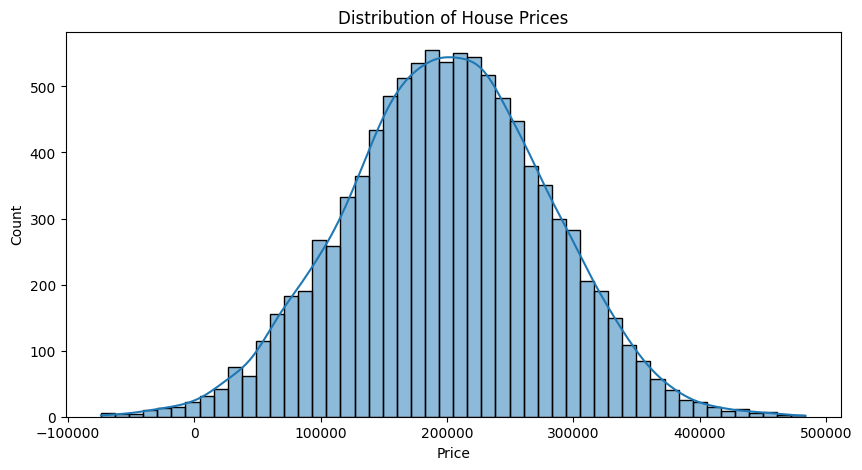

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()

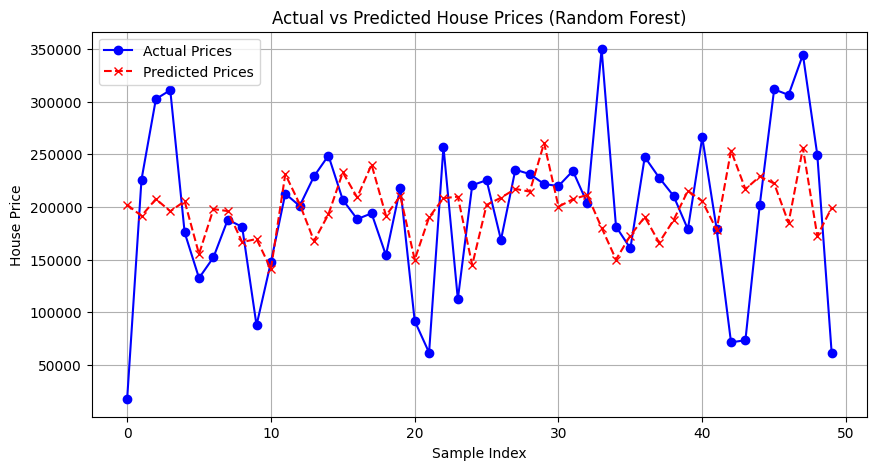

In [38]:
sample_size = 50 
y_test_sample = y_test[:sample_size].values
y_pred_sample = y_pred_rf[:sample_size]

plt.figure(figsize=(10, 5))
plt.plot(range(sample_size), y_test_sample, label='Actual Prices', color='blue', marker='o')
plt.plot(range(sample_size), y_pred_sample, label='Predicted Prices', color='red', linestyle='--', marker='x')
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()